<a href="https://colab.research.google.com/github/elchaima1234/Data-Preprocessing/blob/main/Audio_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create an Audio Signal

In [12]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import librosa
import soundfile as sf #to save a wave file  we can use this lib soundfile sf.write('path', x, sr)

In [6]:
#Create an Audio Signal
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
#numpy. linspace() permet d'obtenir un tableau 1D allant d'une valeur de départ à une valeur de fin avec un nombre donné d'éléments.
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array
#Saving the audio
sf.write('tone_220.wav', x, sr)

In [7]:
ipd.Audio('/content/tone_220.wav')

# Libro fundamentals

**Loading an audio file**

In [8]:
#Loading an audio file
audio_data = '/content/SA1.WAV.wav'
x , sr = librosa.load(audio_data)#This returns an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ mono.
print('data:', x)
print('length :' , len(x))
print('samling rate:', sr )
print(type(x), type(sr))

data: [8.6432410e-05 1.5996955e-04 1.1230589e-04 ... 3.0857790e-04 2.1541197e-04
 0.0000000e+00]
length : 87495
samling rate: 22050
<class 'numpy.ndarray'> <class 'int'>


In [9]:
#We can change this behavior by resampling at 44.1KHz.
librosa.load(audio_data, sr=44100)
#we can also  disable resampling by using librosa.load(audio_path, sr=None)

(array([8.6432410e-05, 1.3942970e-04, 1.5996955e-04, ..., 2.1541197e-04,
        1.2787626e-04, 4.6139390e-05], dtype=float32),
 44100)

**Playing Audio**

In [10]:
#Playing Audio: we can play audiio with ,IPython.display.Audio
import IPython.display as ipd
ipd.Audio(audio_data)

**Visualizing Audio**

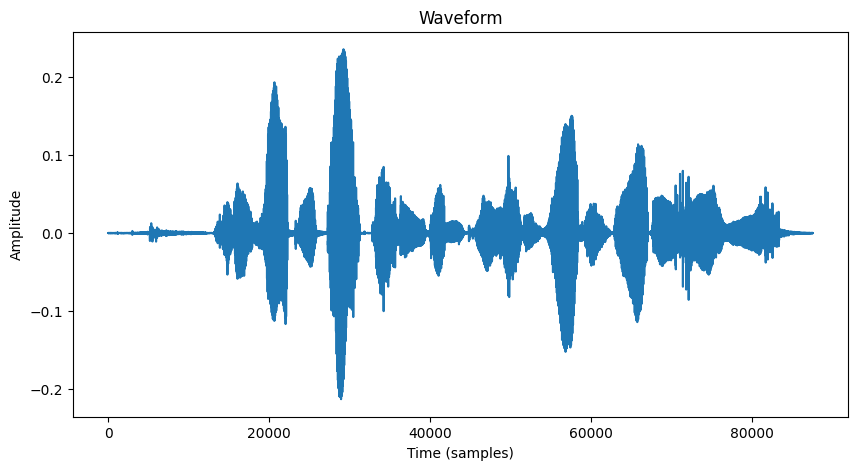

In [13]:
#Visualizing Audio :We can plot the audio array using librosa.display.waveplot
plt.figure(figsize=(10, 5))
plt.plot(x)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

**Spectrogram**

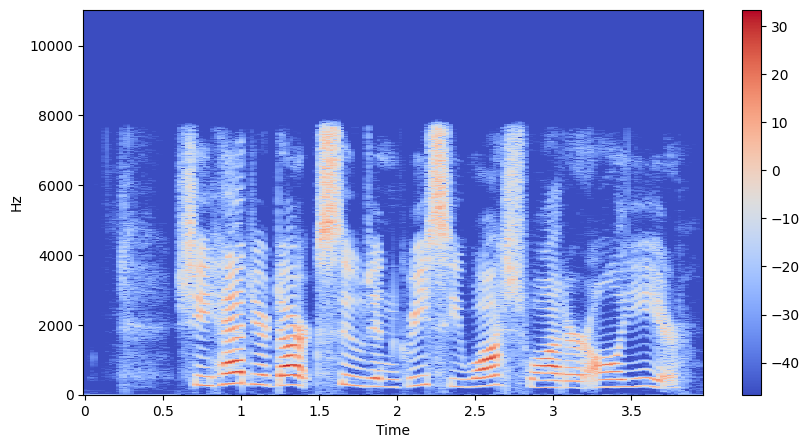

In [14]:
#Spectrogram:A spectrogram is a visual way of representing the signal strength,
# or “loudness”, of a signal over time at various frequencies present in a particular waveform.
#an image with the intensity shown by varying the color or brightness.
X = librosa.stft(x) #.stft() converts data into short term Fourier transform
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(10,5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

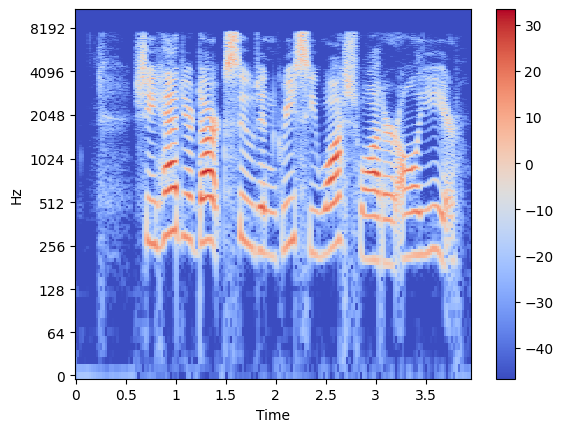

In [15]:
#we can convert the frequency axis to a logarithmic one.
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

**Mel spectrogram**

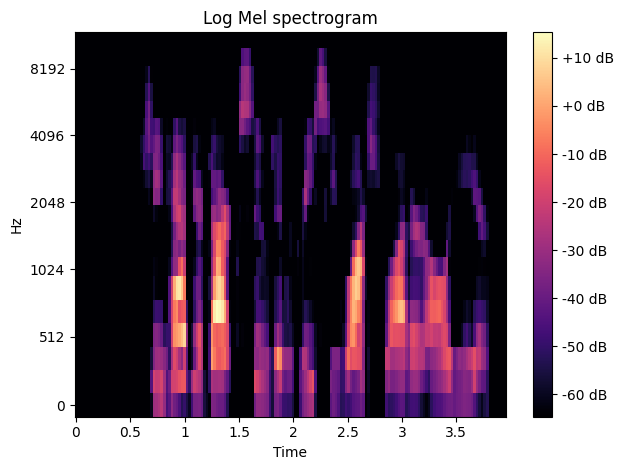

In [18]:
mel_spect = librosa.feature.melspectrogram(y=x,
                                           sr = sr,
                                           n_fft=1024,
                                           n_mels = 20,
                                           hop_length=512,
                                           window='hann')

log_mel_spect = librosa.amplitude_to_db(mel_spect)
librosa.display.specshow(log_mel_spect, sr=sr,x_axis ='time', y_axis='mel',hop_length=512)

plt.colorbar(format="%+2.0f dB")
plt.title("Log Mel spectrogram")
plt.tight_layout()
plt.savefig("Log Mel spectrogram.png")
plt.show()

**MFCC**

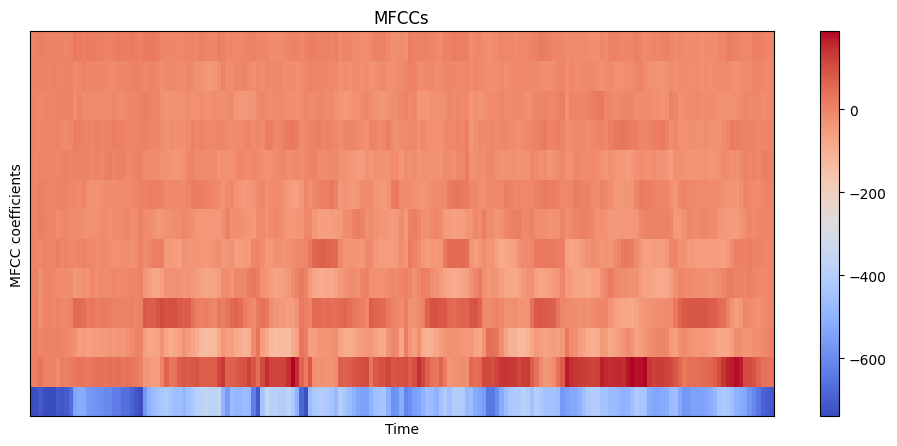

In [20]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(y=x, sr=sr, n_fft=1024,hop_length=512, n_mfcc=13)
# display MFCCs
plt.figure(figsize=(12,5))
librosa.display.specshow(MFCCs, sr=sr, hop_length=512)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
plt.savefig("mfcc.png")
plt.show()

**Audio -> mel spectrogram -> inverse mel spectrogram -> Audio**

In [21]:
my_sample_rate = 16000
# step1 - converting a wav file to numpy array and then converting that to mel-spectrogram
my_audio_as_np_array, my_sample_rate= librosa.load("/content/SA1.WAV.wav")

# step2 - converting audio np array to spectrogram
spec = librosa.feature.melspectrogram(y=my_audio_as_np_array,
                                        sr=my_sample_rate,
                                            n_fft=1024,
                                            hop_length=512,
                                            win_length=None,
                                            window='hann',
                                            center=True,
                                            pad_mode='reflect',
                                            power=2.0)
                                            #n_mels=128)

# step3 converting mel-spectrogrma back to wav file

res = librosa.feature.inverse.mel_to_audio(spec,
                                           sr=my_sample_rate,
                                           n_fft=1024,
                                           hop_length=512,
                                           win_length=None,
                                           window='hann',
                                           center=True,
                                           pad_mode='reflect',
                                           power=2.0,
                                           n_iter=32)
                                           #n_mels=128)

# step4 - save it as a wav file
import soundfile as sf
sf.write("test2.wav", res, my_sample_rate)

**Original Audio**

In [22]:
ipd.Audio("/content/SA1.WAV.wav")

**Reconstructed Audio**

In [23]:
ipd.Audio("/content/test2.wav")

**MFCC**

In [29]:
mfccs = librosa.feature.mfcc(y=x,
                             sr=sr,
                             n_fft=1024,
                             hop_length=512,
                             n_mfcc=12)
mfcc_inver = librosa.feature.inverse.mfcc_to_audio(mfccs,
                                                   sr=sr,
                                                   n_fft=1024,
                                                   hop_length=512,
                                                   )


sf.write("test1.wav", mfcc_inver, sr)

**Reconstructed Audio**

In [30]:
ipd.Audio("/content/test1.wav")